In [186]:
import pandas as pd
import numpy as np
from Functions import Filas_null
from Functions import Clean_values as cv
from Functions import Clean_values_other as cvo
from Functions import num_extract as ne
from Functions import No_blank 
from Functions import Numerizar
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

In [187]:
pd.options.mode.copy_on_write = True

In [188]:
attack = pd.read_csv('Data/attacks.csv', encoding="latin-1")

ValueError: output array is read-only

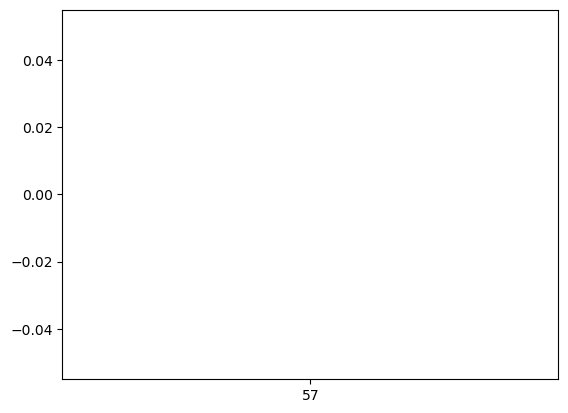

In [189]:
sns.histplot(data=attack, x="Age")

In [ ]:
attack

**LIMPIANDO DATASET**

In [190]:
attack.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [191]:
print(attack.nunique())

Case Number               6287
Date                      5433
Year                       249
Type                         8
Country                    212
Area                       825
Location                  4108
Activity                  1532
Name                      5230
Sex                          6
Age                        157
Injury                    3737
Fatal (Y/N)                  8
Time                       366
Species                   1549
Investigator or Source    4969
pdf                       6291
href formula              6290
href                      6285
Case Number.1             6285
Case Number.2             6286
original order            6308
Unnamed: 22                  1
Unnamed: 23                  2
dtype: int64


In [192]:
Shark_attack = attack.drop(["pdf","href formula","href",'Case Number.1','Case Number.2','original order', 'Unnamed: 22','Unnamed: 23' ], axis = 1)

In [193]:
Shark_attack

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
Shark_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

# Investigando columnas

In [195]:
Shark_attack.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [196]:
Shark_attack.Country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [197]:
Shark_attack.Area.unique()

array(['California', 'Georgia', 'Hawaii', 'New South Wales', 'Colima',
       'Pernambuco', 'Florida', 'Queensland', 'South Carolina',
       'Cornwall', 'Westerm Australia', 'Eastern Cape Province',
       'Hua Hin', 'Cocos Island', 'Western Australia',
       'Alifu Alifu Atoll', 'Western Cape Province', 'New Providence',
       'Alagoas', nan, 'Victoria', 'KwaZulu-Natal',
       'Boi Island, Victoria', 'Galapagos Islands', 'Fernando de Noronha',
       'Sepang', 'Holquin Province', 'Pamplemousses ', 'South Australia',
       'North Island', 'New York', 'Canary Islands', ' Upolu Island',
       'Shizuoka Prefecture', 'Texas', 'Castellón', 'Massachusetts',
       'Red Sea Protectorate', 'New Providence District',
       '40 miles off Grand Bahama Island', 'Ascension Island',
       'New Jersey', 'Majorca', 'Washington', 'Tabasco', 'Anjouan',
       'Ibiza Island', 'Marquesas', 'South Devon', 'New Providence ',
       'Sharjah, ', 'Baja California Sur', 'Saint-Leu', 'South Island',
   


**Cambio columnas**

In [198]:
#Quitar espacios de los nombres de las columnas
Shark_attack.rename(columns={"Case Number":"Case_number",
                       "Fatal (Y/N)":"Fatal",
                        "Investigator or Source":"Investigator_or_Source",
                       }, inplace=True)

In [199]:
Shark_attack.rename(columns={"Sex ":"Sex"}, inplace=True)

In [200]:
Shark_attack.rename(columns={"Species ":"Species"}, inplace=True)

In [201]:
Shark_attack.columns

Index(['Case_number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator_or_Source'],
      dtype='object')

In [202]:
Shark_attack.Case_number.unique()

array(['2018.06.25', '2018.06.18', '2018.06.09', ..., 'ND.0001', '0',
       'xx'], dtype=object)

In [203]:
Shark_attack.Date.unique()

array(['25-Jun-2018', '18-Jun-2018', '09-Jun-2018', ..., '1883-1889',
       '1845-1853', nan], dtype=object)

In [204]:
Shark_attack.Location.unique()

array(['Oceanside, San Diego County', 'St. Simon Island, Glynn County',
       'Habush, Oahu', ..., 'Ocracoke Inlet', 'Panama Bay 8ºN, 79ºW',
       'Below the English fort, Trincomalee'], dtype=object)

In [205]:
Shark_attack.Activity.unique()

array(['Paddling', 'Standing', 'Surfing', ...,
       'Crew swimming alongside their anchored ship',
       '4 men were bathing', 'Wreck of  large double sailing canoe'],
      dtype=object)

In [206]:
Shark_attack.Name.unique()

array(['Julie Wolfe', 'Adyson\xa0McNeely ', 'John Denges', ...,
       'A "chiefess"', 'Ahmun', 'Jules Patterson'], dtype=object)

In [207]:
Shark_attack["Sex"].value_counts()

Sex
M      5094
F       637
M         2
N         2
lli       1
.         1
Name: count, dtype: int64

In [208]:
Shark_attack.Age.unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

In [209]:
Shark_attack.Injury.unique()

array(['No injury to occupant, outrigger canoe and paddle damaged',
       'Minor injury to left thigh',
       'Injury to left lower leg from surfboard skeg', ...,
       'FATAL, leg stripped of flesh  ',
       'FATAL, knocked overboard by tail of shark & carried off by shark ',
       'FATAL. "Shark bit him in half, carrying away the lower extremities" '],
      dtype=object)

In [210]:
Shark_attack.Fatal.unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [211]:
Shark_attack.Time.unique()

array(['18h00', '14h00  -15h00', '07h45', nan, 'Late afternoon', '17h00',
       '14h00', 'Morning', '15h00', '08h15', '11h00', '10h30', '10h40',
       '16h50', '07h00', '09h30', 'Afternoon', '21h50', '09h40', '08h00',
       '17h35', '15h30', '07h30', '19h00, Dusk', 'Night', '16h00',
       '15h01', '12h00', '13h45', '23h30', '09h00', '14h30', '18h30',
       '12h30', '16h30', '18h45', '06h00', '10h00', '10h44', '13h19',
       'Midday', '13h30', '10h45', '11h20', '11h45', '19h30', '08h30',
       '15h45', 'Shortly before 12h00', '17h34', '17h10', '11h15',
       '08h50', '17h45', '13h00', '10h20', '13h20', '02h00', '09h50',
       '11h30', '17h30', '9h00', '10h43', 'After noon', '15h15', '15h40',
       '19h05', '1300', '14h30 / 15h30', '22h00', '16h20', '14h34',
       '15h25', '14h55', '17h46', 'Morning ', '15h49', '19h00',
       'Midnight', '09h30 / 10h00', '10h15', '18h15', '04h00', '14h50',
       '13h50', '19h20', '10h25', '10h45-11h15', '16h45', '15h52',
       '06h15', '14h

In [212]:
Shark_attack.Species.unique()

array(['White shark', nan, '2 m shark', ..., "12' tiger shark",
       'Blue pointers',
       'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable'],
      dtype=object)

In [213]:
Shark_attack.Investigator_or_Source.unique()

array(['R. Collier, GSAF', 'K.McMurray, TrackingSharks.com',
       'B. Myatt, GSAF', ..., 'F. Schwartz, p.23; C. Creswell, GSAF',
       'The Sun, 10/20/1938', 'S.W. Baker'], dtype=object)

# Limpiando Dataset

In [214]:
from Functions import Filas_null

In [215]:
Filas_null(Shark_attack,80)

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


In [216]:
Shark_attack

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


In [217]:
Shark_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal                   5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

In [218]:
# Duplicados:
Prova = Shark_attack.copy()

In [219]:
Prova.drop_duplicates()

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


# Sex_Clean in Shark_attack dataframe

In [220]:
Shark_attack.Sex.unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [221]:
Shark_attack.loc[(Shark_attack["Sex"] == "M ") | (Shark_attack["Sex"] == "N"), "Sex"] = "M"

In [222]:
Shark_attack.loc[(Shark_attack["Sex"] == "lli") | (Shark_attack["Sex"] == "."), "Sex"] = "Undefined"

# Year_Clean in Shark_attack dataframe

In [223]:
Shark_attack.Year.unique()

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [224]:
Shark_attack["Year"].value_counts() #Retocaremos Year -- quitamos todos los 0 y los ponemos NA

Year
2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
         ... 
1786.0      1
1785.0      1
1784.0      1
1783.0      1
1815.0      1
Name: count, Length: 249, dtype: int64

In [225]:
Shark_attack["Year"].max()

2018.0

In [226]:
Shark_attack["Year"].min()

0.0

In [227]:
Shark_attack.loc[(Shark_attack["Year"] < 1000), "Year"] = pd.NA

# Fatal_Clean in Shark_attack dataframe

In [228]:
Shark_attack.Fatal.unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [229]:
Shark_attack.loc[(Shark_attack["Fatal"] == "M") |
                 (Shark_attack["Fatal"] == " N")|
                 (Shark_attack["Fatal"] == "N "), "Fatal"]= "N"

In [230]:
Shark_attack.loc[(Shark_attack["Fatal"] == "y"), "Fatal"]= "Y"

In [231]:
Shark_attack.loc[(Shark_attack["Fatal"] == "UNKNOWN") |
                 (Shark_attack["Fatal"] == '2017')|
                 (Shark_attack["Fatal"] == "nan"), "Fatal"]= pd.NA

In [232]:
Shark_attack.replace({np.nan: None, pd.NA: None}, inplace=True)

# Activty_Clean in Shark_attack dataframe

In [233]:
Shark_attack.Activity.unique()

array(['Paddling', 'Standing', 'Surfing', ...,
       'Crew swimming alongside their anchored ship',
       '4 men were bathing', 'Wreck of  large double sailing canoe'],
      dtype=object)

In [234]:
#Board_sports
cv(Shark_attack,"Activity","Board_sports",["Board","Surf","Kite","Paddle","Paddling","Row","ski"])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,None,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Pearl diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938"


In [235]:
#Diving
cv(Shark_attack,"Activity","Diving",["Dive","Film","Snorkel","Diving","Collect","scuba"])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938"


In [236]:
#Swimming
cv(Shark_attack,"Activity","Swimming",["Swim","Bath","Float","play","splash","Stand","Walking","Adrift","Wading"])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938"


In [237]:
#Fishing
cv(Shark_attack,"Activity","Fishing",["Spear","Fishing","hunt","lobster","oyster","pearl","tuna","Fisherman","Fish"])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938"


In [238]:
#Water_vehicle
cv(Shark_attack,"Activity","Water_vehicle",["Boat","ship","Canoe","Kayak","yacht","sink","Ferry","Barque","Sail"])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938"


In [239]:
#Interacting_with_sharks
cv(Shark_attack,"Activity","Interacting_with_sharks",["Shark"])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938"


In [240]:
#Plane_crash
cv(Shark_attack,"Activity","Plane_crash",["air","plane","boeing"])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938"


In [241]:
#Other
cv(Shark_attack,"Activity","Plane_crash",["air","plane","boeing"])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938"


In [242]:
# None as 'None'
Shark_attack.replace({None: 'None'}, inplace=True)

In [243]:
Shark_attack["Activity"].value_counts()

Activity
Swimming                                                                                                  1677
Board_sports                                                                                              1646
Fishing                                                                                                   1069
Diving                                                                                                     691
None                                                                                                       544
                                                                                                          ... 
Testing classified underwater electronic gear for Raytheon Corporation, vessel torn apart by explosion       1
Gigging for flounder                                                                                         1
On inflatable raft                                                                                     

In [244]:
Shark_attack.Activity.unique().tolist()

['Board_sports',
 'Swimming',
 'Diving',
 'Fishing',
 'Interacting_with_sharks',
 'None',
 'Water_vehicle',
 'SUP',
 'Photo shoot',
 'Kakaying',
 'Washing hands',
 'Feeding stingrays?',
 'Sea disaster',
 'Treading water',
 'Sitting in the water',
 'Kneeling in the water',
 'Fell into the water',
 'Casting a net',
 'Jumping in the waves',
 'Attempting to fix motor',
 'Rescuing',
 'Washing his feet',
 'Crawling',
 'Plane_crash',
 'Crabbing',
 'Sea Disaster',
 'Jumping',
 'Jumped into the water',
 'Murder',
 'Shrimping',
 'Lifesaving drill',
 "Crouching in 2' of water",
 'Swept out to sea by the tsunami, she clung  to a log for 24 hours',
 'Unknown',
 'Attempting to retreive a dinghy',
 'Hiking on the beach',
 'Batin',
 'Attempting to catch a crocodile',
 'Conducting research',
 'Attempting to illegally enter the USA',
 "Lying prone in 2' of water",
 "Scientific research (Dr. Sonny Gruber's student)",
 'Cruising',
 'Towing rubber dinghy',
 'Watching seals',
 'Attempting to attract dolphin

In [245]:
cvo(Shark_attack,"Activity",['Board_sports','Swimming','Fishing','Diving','None','Water_vehicle','Interacting_with_sharks','Plane_crash'])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938"


In [246]:
#'None' as None
Shark_attack.replace({'None': None}, inplace=True)

# Year_Clean in Shark_attack dataframe

In [247]:
Shark_attack["Age"].value_counts()

Age
17                154
18                150
19                142
20                141
15                139
                 ... 
20?                 1
 28                 1
7      &    31      1
 30                 1
13 or 14            1
Name: count, Length: 157, dtype: int64

In [248]:
Shark_attack.Age.unique().tolist()
#Si tiene "months" resumimos y que tenga un año
#para el resto, hacer un regex del primer grupo de dos int si no hay int - None

['57',
 '11',
 '48',
 None,
 '18',
 '52',
 '15',
 '12',
 '32',
 '10',
 '21',
 '34',
 '30',
 '60',
 '33',
 '29',
 '54',
 '41',
 '37',
 '56',
 '19',
 '25',
 '69',
 '38',
 '55',
 '35',
 '46',
 '45',
 '14',
 '40s',
 '28',
 '20',
 '24',
 '26',
 '49',
 '22',
 '7',
 '31',
 '17',
 '40',
 '13',
 '42',
 '3',
 '8',
 '50',
 '16',
 '82',
 '73',
 '20s',
 '68',
 '51',
 '39',
 '58',
 'Teen',
 '47',
 '61',
 '65',
 '36',
 '66',
 '43',
 '60s',
 '9',
 '72',
 '59',
 '6',
 '27',
 '64',
 '23',
 '71',
 '44',
 '62',
 '63',
 '70',
 '18 months',
 '53',
 '30s',
 '50s',
 'teen',
 '77',
 '74',
 '28 & 26',
 '5',
 '86',
 '18 or 20',
 '12 or 13',
 '46 & 34',
 '28, 23 & 30',
 'Teens',
 '36 & 26',
 '8 or 10',
 '84',
 '\xa0 ',
 ' ',
 '30 or 36',
 '6½',
 '21 & ?',
 '75',
 '33 or 37',
 'mid-30s',
 '23 & 20',
 ' 30',
 '7      &    31',
 ' 28',
 '20?',
 "60's",
 '32 & 30',
 '16 to 18',
 '87',
 '67',
 'Elderly',
 'mid-20s',
 'Ca. 33',
 '74 ',
 '45 ',
 '21 or 26',
 '20 ',
 '>50',
 '18 to 22',
 'adult',
 '9 & 12',
 '? & 19',
 '

In [249]:
cv(Shark_attack,"Age",1,["Month"])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938"


In [250]:
ne(Shark_attack,"Age",2)

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,NaN,Minor injury to lower leg,N,None,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,NaN,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,NaN,FATAL,Y,None,None,"The Sun, 10/20/1938"


In [251]:
#nan as None
Shark_attack.replace({np.nan: None}, inplace=True)

# Species_Clean in Shark_attack dataframe

In [252]:
#Puede que haya que revisar
Shark_attack.Species.unique().tolist()
Shark_attack.Species.value_counts()

Species
White shark                                                                                                                      163
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   88
Tiger shark                                                                                                                       73
                                                                                                                                ... 
1.2 m to 1.5 m [4.5' to 5'] shark                                                                                                  1
Bull shark, 2.3 m [7.5']                                     

In [253]:

cv(Shark_attack,"Species","Whitetip",["Whitetip"])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938"


In [254]:
cv(Shark_attack,"Species","Bronze",["Bronze"])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938"


In [255]:
cv(Shark_attack,"Species","white",["White ","Whiteshark"])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938"


In [256]:
cv(Shark_attack,"Species","Sandtiger",["Sandtiger"])
cv(Shark_attack,"Species","Bull",["Bull"])
cv(Shark_attack,"Species","Reef",["Reef"])
cv(Shark_attack,"Species","Blacktip",["Blacktip", "Black"])
cv(Shark_attack,"Species","Wobbegong",["Wobbegong"])
cv(Shark_attack,"Species","Spinner",["Spinner"])
cv(Shark_attack,"Species","Nurse",["Nurse"])
cv(Shark_attack,"Species","tiger",["Tiger"])
cv(Shark_attack,"Species","Blue",["Blue"])
cv(Shark_attack,"Species","Cookie cutter",["Cookie"])
cv(Shark_attack,"Species","Lemon",["Lemon"])
cv(Shark_attack,"Species","Angel",["Angel"])
cv(Shark_attack,"Species","Mako",["Mako"])
cv(Shark_attack,"Species","Hammerhead",["Hammerhead"])
cv(Shark_attack,"Species","Goblin",["Goblin"])
cv(Shark_attack,"Species","Raggedtooth",["Ragged"])
cv(Shark_attack,"Species","Salmon",["Salmon"])
cv(Shark_attack,"Species","Sevengill",["Sevengill"])
cv(Shark_attack,"Species","Porbeagle",["Porbeagle"])
cv(Shark_attack,"Species","Dusky",["Dusky"])
cv(Shark_attack,"Species","Grey",["Grey"])
cv(Shark_attack,"Species","Not_shark_involvement",["not confirmed","unconfirmed"])
cv(Shark_attack,"Species","Zambesi",["Zambesi"])
cv(Shark_attack,"Species","Sandshark",["Sand"])
cv(Shark_attack,"Species","Dogshark",["dog"])
cv(Shark_attack,"Species","Carpet",["Carpet"])
cv(Shark_attack,"Species","Whaler",["Whaler"])
cv(Shark_attack,"Species","Shovelnose",["Shovelnose"])
cv(Shark_attack,"Species","Galapagos",["Galapagos"])
Shark_attack.replace({None: 'None'}, inplace=True)

In [257]:
cvo(Shark_attack,"Species",['None',"Sandtiger","Bull","Reef","Blacktip","Wobbegong","Spinner","Nurse","tiger","Blue","Cookie cutter","Lemon"
                            ,"Angel","Mako","Bronze","Hammerhead","Goblin","Raggedtooth","Salmon","Sevengill","Porbeagle","Dusky","Grey"
                            ,"Not_shark_involvement","Zambesi","Sandshark","Dogshark","Carpet","Whaler","Shovelnose","Galapagos","White","Whitetip"])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,Other,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,tiger,A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938"


In [258]:
Shark_attack.replace({'None': None}, inplace=True)

# Country_Clean in Shark_attack dataframe

In [259]:
Shark_attack.Country.unique().tolist()
#Shark_attack.Country.value_counts()

['USA',
 'AUSTRALIA',
 'MEXICO',
 'BRAZIL',
 'ENGLAND',
 'SOUTH AFRICA',
 'THAILAND',
 'COSTA RICA',
 'MALDIVES',
 'BAHAMAS',
 'NEW CALEDONIA',
 'ECUADOR',
 'MALAYSIA',
 'LIBYA',
 None,
 'CUBA',
 'MAURITIUS',
 'NEW ZEALAND',
 'SPAIN',
 'SAMOA',
 'SOLOMON ISLANDS',
 'JAPAN',
 'EGYPT',
 'ST HELENA, British overseas territory',
 'COMOROS',
 'REUNION',
 'FRENCH POLYNESIA',
 'UNITED KINGDOM',
 'UNITED ARAB EMIRATES',
 'PHILIPPINES',
 'INDONESIA',
 'CHINA',
 'COLUMBIA',
 'CAPE VERDE',
 'Fiji',
 'DOMINICAN REPUBLIC',
 'CAYMAN ISLANDS',
 'ARUBA',
 'MOZAMBIQUE',
 'FIJI',
 'PUERTO RICO',
 'ITALY',
 'ATLANTIC OCEAN',
 'GREECE',
 'ST. MARTIN',
 'FRANCE',
 'PAPUA NEW GUINEA',
 'TRINIDAD & TOBAGO',
 'KIRIBATI',
 'ISRAEL',
 'DIEGO GARCIA',
 'TAIWAN',
 'JAMAICA',
 'PALESTINIAN TERRITORIES',
 'GUAM',
 'SEYCHELLES',
 'BELIZE',
 'NIGERIA',
 'TONGA',
 'SCOTLAND',
 'CANADA',
 'CROATIA',
 'SAUDI ARABIA',
 'CHILE',
 'ANTIGUA',
 'KENYA',
 'RUSSIA',
 'TURKS & CAICOS',
 'UNITED ARAB EMIRATES (UAE)',
 'AZORES',


In [260]:
cv(Shark_attack,"Country","USA",["usa"])
cv(Shark_attack,"Country","AUSTRALIA",["australia"])
cv(Shark_attack,"Country","South Africa",["south africa", "africa south"])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,Other,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,tiger,A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938"


In [261]:
Shark_attack.replace({None: 'None'}, inplace=True)

In [262]:
No_blank(Shark_attack,"Country") #Quitamos blanks delate y detrás.

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,Other,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,tiger,A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938"


In [263]:
Shark_attack.replace({'None': None}, inplace=True)

# Side injured

In [264]:
#Creamos una nueva columna "Side" que vienen de injury left or right.
Shark_attack["Side"] = np.where(Shark_attack["Injury"].str.contains("left",case=False)==True, "left", Shark_attack["Injury"])

In [265]:
cv(Shark_attack,"Side","right",["Right"])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source,Side
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white,"R. Collier, GSAF","No injury to occupant, outrigger canoe and pad..."
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com",left
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com",left
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,Other,"B. Myatt, GSAF",Minor injury to lower leg
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,tiger,A .Kipper,Lacerations to leg & hand shark PROVOKED INCIDENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234",FATAL
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234",FATAL
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF",FATAL
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938",FATAL


In [266]:
Shark_attack.replace({None: 'None'}, inplace=True)

In [267]:
cvo(Shark_attack,"Side",['None', 'right','left'])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source,Side
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white,"R. Collier, GSAF",Other
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com",left
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com",left
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,Other,"B. Myatt, GSAF",Other
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,tiger,A .Kipper,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234",Other
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234",Other
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF",Other
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938",Other


In [268]:
Shark_attack.Side.value_counts()

Side
Other                                                                                    4703
left                                                                                      824
right                                                                                     746
None                                                                                       28
Of the 20 crew, 4 were bitten by shark. None of their iinjuries were life-threatening       1
Name: count, dtype: int64

In [269]:
cv(Shark_attack,"Side","Other",["bitten"])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source,Side
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white,"R. Collier, GSAF",Other
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com",left
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com",left
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,Other,"B. Myatt, GSAF",Other
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,tiger,A .Kipper,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234",Other
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234",Other
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF",Other
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938",Other


In [270]:
Shark_attack.replace({'None': None}, inplace=True)

# Body part injured

In [272]:
cv(Shark_attack,"Injury","Head",["face","head","neck","chin","cheek","eye","nose",'ear','jaw','tooth','teeth'])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source,Side
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white,"R. Collier, GSAF",Other
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com",left
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com",left
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,Other,"B. Myatt, GSAF",Other
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Lacerations to leg & hand shark PROVOKED INCIDENT,N,None,tiger,A .Kipper,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234",Other
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234",Other
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF",Other
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938",Other


In [273]:
cv(Shark_attack,"Injury","Arms",["hand","arm","finger","Shoulder","elbow","wrist","thumb",'biceps','triceps'])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source,Side
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white,"R. Collier, GSAF",Other
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com",left
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,None,"K.McMurray, TrackingSharks.com",left
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Minor injury to lower leg,N,None,Other,"B. Myatt, GSAF",Other
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Arms,N,None,tiger,A .Kipper,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234",Other
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234",Other
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF",Other
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938",Other


In [274]:
cv(Shark_attack,"Injury","Legs",["foot","leg","ankle","heel","calf","butt","thigh",'hip','toe','shin','lower','feet'])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source,Side
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white,"R. Collier, GSAF",Other
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Legs,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com",left
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Legs,N,07h45,None,"K.McMurray, TrackingSharks.com",left
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Legs,N,None,Other,"B. Myatt, GSAF",Other
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Arms,N,None,tiger,A .Kipper,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234",Other
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234",Other
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF",Other
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938",Other


In [275]:
cv(Shark_attack,"Injury","Torso",["abd","torso","pectoral","rib","dors","spin",'belly','stomach'])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source,Side
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white,"R. Collier, GSAF",Other
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Legs,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com",left
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Legs,N,07h45,None,"K.McMurray, TrackingSharks.com",left
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Legs,N,None,Other,"B. Myatt, GSAF",Other
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Arms,N,None,tiger,A .Kipper,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234",Other
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234",Other
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF",Other
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938",Other


In [276]:
cv(Shark_attack,"Injury","No_injury",["no injury"])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source,Side
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,No_injury,N,18h00,white,"R. Collier, GSAF",Other
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Legs,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com",left
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Legs,N,07h45,None,"K.McMurray, TrackingSharks.com",left
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Legs,N,None,Other,"B. Myatt, GSAF",Other
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Arms,N,None,tiger,A .Kipper,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, p. 234",Other
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,FATAL,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234",Other
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,FATAL,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF",Other
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,FATAL,Y,None,None,"The Sun, 10/20/1938",Other


In [279]:
cv(Shark_attack,"Injury","Fatal",["Fatal"])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source,Side
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,No_injury,N,18h00,white,"R. Collier, GSAF",Other
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Legs,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com",left
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Legs,N,07h45,None,"K.McMurray, TrackingSharks.com",left
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Legs,N,None,Other,"B. Myatt, GSAF",Other
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Arms,N,None,tiger,A .Kipper,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,Fatal,Y,None,None,"H. Taunton; N. Bartlett, p. 234",Other
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,Fatal,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234",Other
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,Fatal,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF",Other
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,Fatal,Y,None,None,"The Sun, 10/20/1938",Other


In [280]:
Shark_attack.Injury.unique().tolist()
Shark_attack.Injury.value_counts()

Injury
Legs                                                          2298
Fatal                                                         1014
Arms                                                           950
No_injury                                                      719
Head                                                           457
                                                              ... 
Human remains recovered, evidence of scavenging by shark/s       1
Death was due to drowning; body scavenged by a tiger shark       1
Bruised                                                          1
Found to be a hoax                                               1
2-inch lacerations                                               1
Name: count, Length: 517, dtype: int64

In [94]:
Shark_attack.replace({None: 'None'}, inplace=True)

In [281]:
cvo(Shark_attack,'Injury',['None','Head','Arms','Legs','Torso','No_injury','Fatal'])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source,Side
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,No_injury,N,18h00,white,"R. Collier, GSAF",Other
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Legs,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com",left
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Legs,N,07h45,None,"K.McMurray, TrackingSharks.com",left
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Legs,N,None,Other,"B. Myatt, GSAF",Other
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Arms,N,None,tiger,A .Kipper,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,Fatal,Y,None,None,"H. Taunton; N. Bartlett, p. 234",Other
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,Fatal,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234",Other
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,Fatal,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF",Other
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,Fatal,Y,None,None,"The Sun, 10/20/1938",Other


In [282]:
cv(Shark_attack,"Injury","Other",["bitten"])

,Case_number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source,Side
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Board_sports,Julie Wolfe,F,57,No_injury,N,18h00,white,"R. Collier, GSAF",Other
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Swimming,Adyson McNeely,F,11,Legs,N,14h00 -15h00,None,"K.McMurray, TrackingSharks.com",left
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Board_sports,John Denges,M,48,Legs,N,07h45,None,"K.McMurray, TrackingSharks.com",left
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Board_sports,male,M,None,Legs,N,None,Other,"B. Myatt, GSAF",Other
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,None,Arms,N,None,tiger,A .Kipper,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,None,Fatal,Y,None,None,"H. Taunton; N. Bartlett, p. 234",Other
6298,ND.0004,Before 1903,None,Unprovoked,AUSTRALIA,Western Australia,None,Diving,Ahmun,M,None,Fatal,Y,None,None,"H. Taunton; N. Bartlett, pp. 233-234",Other
6299,ND.0003,1900-1905,None,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,None,Fatal,Y,None,None,"F. Schwartz, p.23; C. Creswell, GSAF",Other
6300,ND.0002,1883-1889,None,Unprovoked,PANAMA,None,"Panama Bay 8ºN, 79ºW",None,Jules Patterson,M,None,Fatal,Y,None,None,"The Sun, 10/20/1938",Other


In [283]:
Shark_attack.replace({'None': None}, inplace=True)

# Sociodemografía

In [284]:
Socio = Shark_attack[['Year','Age','Sex','Injury','Fatal','Country','Side','Activity']]

In [285]:
Socio


,Year,Age,Sex,Injury,Fatal,Country,Side,Activity
0,2018.0,57,F,No_injury,N,USA,Other,Board_sports
1,2018.0,11,F,Legs,N,USA,left,Swimming
2,2018.0,48,M,Legs,N,USA,left,Board_sports
3,2018.0,None,M,Legs,N,AUSTRALIA,Other,Board_sports
4,2018.0,None,M,Arms,N,MEXICO,Other,Diving
...,...,...,...,...,...,...,...,...
6297,None,None,M,Fatal,Y,AUSTRALIA,Other,Diving
6298,None,None,M,Fatal,Y,AUSTRALIA,Other,Diving
6299,None,None,M,Fatal,Y,USA,Other,Swimming
6300,None,None,M,Fatal,Y,PANAMA,Other,None


In [286]:

Socio.Injury.value_counts()

Injury
Legs         2298
Fatal        1014
Arms          950
Other         795
No_injury     719
Head          457
Torso          69
Name: count, dtype: int64

In [101]:
Socio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      6172 non-null   object
 1   Age       3321 non-null   object
 2   Sex       5737 non-null   object
 3   Injury    6274 non-null   object
 4   Fatal     5691 non-null   object
 5   Country   6252 non-null   object
 6   Side      6274 non-null   object
 7   Activity  5758 non-null   object
dtypes: object(8)
memory usage: 394.0+ KB


In [102]:
Socio['Year'] = Socio['Year'].astype(int)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [ ]:
#Me llamo Toni. Y soy una persona a la que le gustan mucho los deportes de tabla. Hace poco me aficioné al surf y he estado surfeando por las costas de España.
#Aunque mi sueño realmente es surfear en Australia. 
#Pero recientemente tengo un miedo y este es:
#¿Soy el público taget de los tiburones?
#Quán probable es sufrir un el ataque de un tiburon con mis características sociodemográficas?
#Hago deportes de tabla
#Soy hombre
#Tengo entre 25 - 30 años
#Vivo en España

#Aumentan las posibilidades si cumplo mi sueño?
#Además también quiero comprobar si los tiburones tienen predilección por alguna parte del cuerpo en especial y, si perder alguna de ellas aumenta el índice de mortalidad.

In [146]:
#Empezamos por los deportes de tabla: 
Tabla = Socio[['Activity']]

In [147]:
Tabla

,Activity
0,Board_sports
1,Swimming
2,Board_sports
3,Board_sports
4,Diving
...,...
6297,Diving
6298,Diving
6299,Swimming
6300,None


In [148]:
Filas_null(Tabla,10)

,Activity
0,Board_sports
1,Swimming
2,Board_sports
3,Board_sports
4,Diving
...,...
6296,Swimming
6297,Diving
6298,Diving
6299,Swimming


<Axes: xlabel='Activity'>

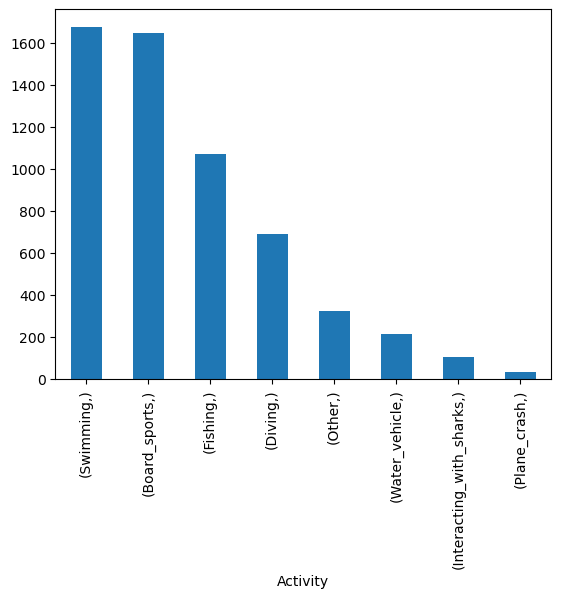

In [149]:
#Okay, parece que dentro de la muestra, nuestra actividad parece ser de las mas peligrosas. 
Tabla[["Activity",]].value_counts().plot(kind = 'bar')

In [103]:
Edad = Socio[['Age']]

In [104]:
Filas_null(Edad,10)

,Age
0,57
1,11
2,48
6,18
7,52
...,...
6243,16
6254,50
6265,13
6276,16


In [105]:
Edad['Age'] = Edad['Age'].astype(int)

In [106]:
Edad.reset_index(inplace = True)

In [107]:
Edad

,index,Age
0,0,57
1,1,11
2,2,48
3,6,18
4,7,52
...,...,...
3316,6243,16
3317,6254,50
3318,6265,13
3319,6276,16


In [108]:
Edad.drop('index', inplace = True, axis = 1)

In [109]:
#Edad.Age.unique().tolist()
Edad.Age.value_counts()
Edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     3321 non-null   int32
dtypes: int32(1)
memory usage: 13.1 KB


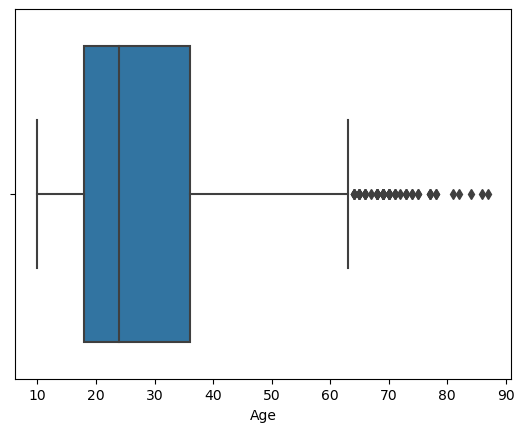

In [110]:
#Para la edad, vemos que el mayor número de ataques se producen en gente joven. A partir de los 60, con los datos que tenemos, podríamos considerarlo fuera de lugar
sns.boxplot(x="Age", data=Edad); #Poner la barra de la media en el gráfico

In [111]:
Edad.groupby("Age")

In [112]:
Sex = Socio[['Sex']]


In [113]:
Filas_null(Sex,10)

,Sex
0,F
1,F
2,M
3,M
4,M
...,...
6297,M
6298,M
6299,M
6300,M


<Axes: xlabel='Sex'>

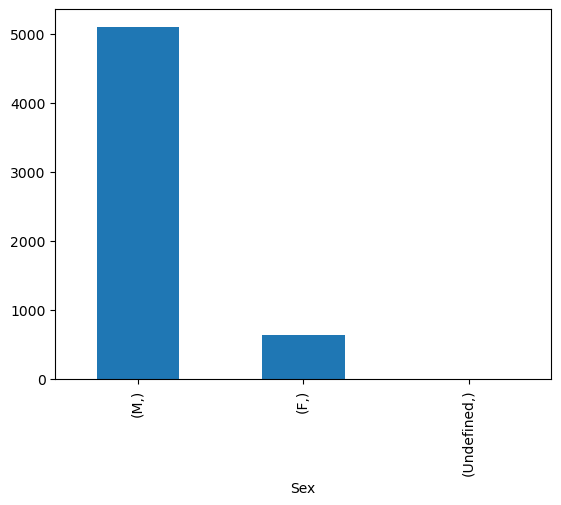

In [114]:
#Vemos que casi todos los casos registrados la victima es un hombre
Sex[["Sex",]].value_counts().plot(kind = 'bar')

In [152]:
Sexpie = Sex[["Sex"]].value_counts() #Quitar undefined

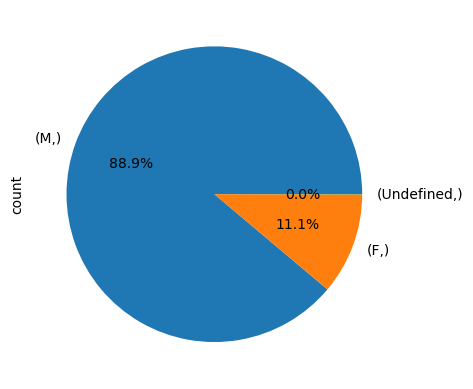

In [153]:
Sexpie.plot.pie(autopct="%.1f%%");

In [115]:
Country = Socio[['Country']]

In [116]:
Filas_null(Country,10)

,Country
0,USA
1,USA
2,USA
3,AUSTRALIA
4,MEXICO
...,...
6297,AUSTRALIA
6298,AUSTRALIA
6299,USA
6300,PANAMA


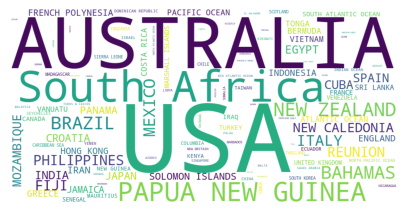

In [117]:
#Vemos que dentro España se han detectado ciertos casos de ataques de tiburones pero no son demasiados comparado con otros países
data = Country['Country'].value_counts().to_dict()
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)

plt.figure(figsize=(5, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [118]:
#Por lo que parece, excepto por el país, sí que soy público target de recibir un ataque de tiburón. 

In [119]:
Socio

,Year,Age,Sex,Injury,Fatal,Country,Side,Activity
0,2018.0,57,F,No_injury,N,USA,Other,Board_sports
1,2018.0,11,F,Legs,N,USA,left,Swimming
2,2018.0,48,M,Legs,N,USA,left,Board_sports
3,2018.0,None,M,Legs,N,AUSTRALIA,Other,Board_sports
4,2018.0,None,M,Arms,N,MEXICO,Other,Diving
...,...,...,...,...,...,...,...,...
6297,None,None,M,Fatal,Y,AUSTRALIA,Other,Diving
6298,None,None,M,Fatal,Y,AUSTRALIA,Other,Diving
6299,None,None,M,Fatal,Y,USA,Other,Swimming
6300,None,None,M,Fatal,Y,PANAMA,Other,None


In [165]:
Corr_df_ES = Socio[['Sex','Age','Country','Activity','Fatal']]

In [166]:
Filas_null(Corr_df_ES,10)

,Sex,Age,Country,Activity,Fatal
0,F,57,USA,Board_sports,N
1,F,11,USA,Swimming,N
2,M,48,USA,Board_sports,N
6,M,18,BRAZIL,Swimming,Y
7,M,52,USA,Fishing,N
...,...,...,...,...,...
6243,M,16,IRAQ,Swimming,N
6254,M,50,CUBA,Board_sports,Y
6265,M,13,IRAQ,Swimming,Y
6276,M,16,BELIZE,Swimming,Y


In [167]:
Numerizar(Corr_df_ES,"Sex","M",'Sex_num')
Corr_df_ES.drop('Sex', inplace=True, axis = 1)

In [170]:
#Numerizar(Corr_df_ES,"Country","AUSTRALIA",'Country_num')
#Corr_df_ES.drop('Country', inplace=True, axis = 1)

In [171]:
Numerizar(Corr_df_ES,"Fatal","Y",'Fatal_num')
Corr_df_ES.drop('Fatal', inplace=True, axis = 1)

KeyError: 'Fatal'

In [173]:
Numerizar(Corr_df_ES,"Activity","Board_sports",'Activity_num')
Corr_df_ES.drop('Activity', inplace=True, axis = 1)

In [174]:
Corr_df_ES

,Age,Country,Sex_num,Fatal_num,Activity_num
0,57,USA,0,0,1
1,11,USA,0,0,0
2,48,USA,1,0,1
6,18,BRAZIL,1,1,0
7,52,USA,1,0,0
...,...,...,...,...,...
6243,16,IRAQ,1,0,0
6254,50,CUBA,1,1,1
6265,13,IRAQ,1,1,0
6276,16,BELIZE,1,1,0


In [175]:
Corr_aus = Corr_df_ES[Corr_df_ES['Country'].isin(["AUSTRALIA"])]

In [178]:
Corr_aus.drop('Country', inplace=True, axis = 1)

In [181]:
corraus

,Age,Sex_num,Fatal_num,Activity_num
Age,1.000000,-0.019835,-0.020286,0.000403
Sex_num,-0.019835,1.000000,0.016783,0.052920
Fatal_num,-0.020286,0.016783,1.000000,-0.207401
Activity_num,0.000403,0.052920,-0.207401,1.000000


<Axes: >

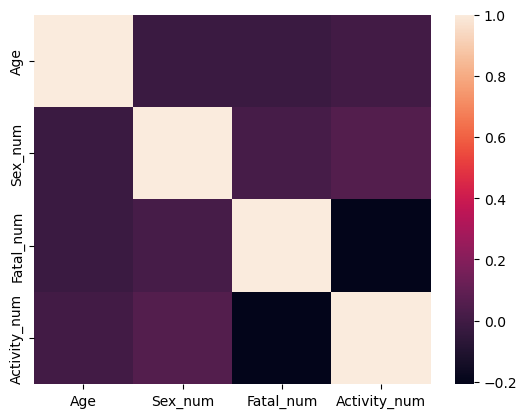

In [179]:
corraus = Corr_aus.corr()
sns.heatmap(corraus)

In [161]:
Corr_df_ES.Country_num.unique().tolist()
Corr_df_ES.Country_num.value_counts()
#Corr_df_ES.info()

Country_num
0    2343
1     628
Name: count, dtype: int64

In [162]:
corr = Corr_df_ES.corr()

In [163]:
corr

,Age,Sex_num,Country_num,Fatal_num,Activity_num
Age,1.000000,-0.018669,0.003107,-0.009432,-0.085665
Sex_num,-0.018669,1.000000,0.072821,0.031441,0.131575
Country_num,0.003107,0.072821,1.000000,0.124130,-0.036503
Fatal_num,-0.009432,0.031441,0.124130,1.000000,-0.185988
Activity_num,-0.085665,0.131575,-0.036503,-0.185988,1.000000


<Axes: >

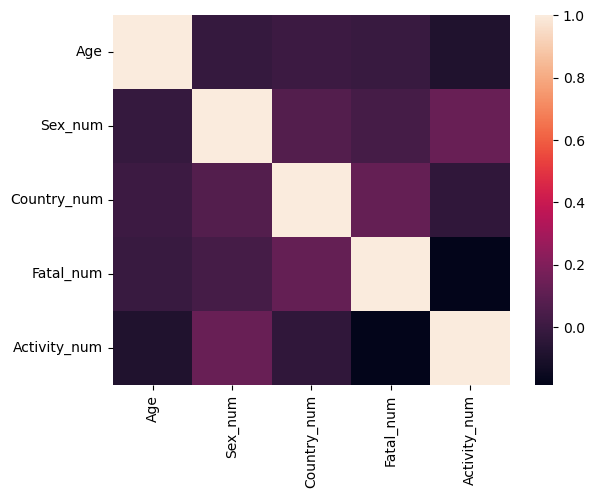

In [164]:
sns.heatmap(corr) #Aquí descubrimos que el surf está correlacionado negativamente con Fatal. Entendiendo que no es de las actividades más moríferas. 

In [131]:
#Comprobar todas las actividades con el fatal

In [327]:
Activity_corr = Socio[['Activity','Fatal','Country']]

In [133]:
Filas_null(Activity_corr,10)

,Activity,Fatal
0,Board_sports,N
1,Swimming,N
2,Board_sports,N
3,Board_sports,N
4,Diving,N
...,...,...
6296,Swimming,Y
6297,Diving,Y
6298,Diving,Y
6299,Swimming,Y


In [134]:
Numerizar(Activity_corr,"Fatal","Y",'Fatal_num')


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Board_sports'),
  Text(1, 0, 'Swimming'),
  Text(2, 0, 'Diving'),
  Text(3, 0, 'Fishing'),
  Text(4, 0, 'Interacting_with_sharks'),
  Text(5, 0, 'Water_vehicle'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'Plane_crash')])

<Figure size 1000x1000 with 0 Axes>

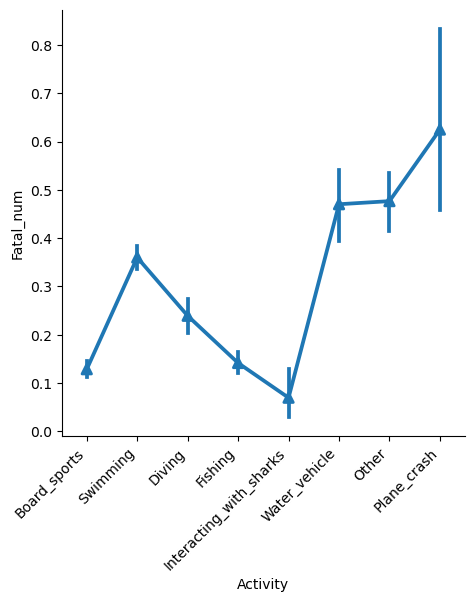

In [135]:
plt.figure(figsize=(10, 10))
sns.catplot(
    data=Activity_corr, x="Activity", y="Fatal_num",
    markers=["^", "o"], linestyles=["-", "--"], kind="point")
plt.xticks(rotation=45, ha='right')

In [136]:
#Mirar de hacer una máscara para seleccionar solo España y Australia para poner el HUE a este gráfico

In [137]:
Spain_Aus = Socio[Socio['Country'].isin(["SPAIN", "AUSTRALIA"])]

In [138]:
SPAIN = Spain_Aus[['Country','Fatal','Activity']]

In [139]:
Filas_null(SPAIN,10)

,Country,Fatal,Activity
3,AUSTRALIA,N,Board_sports
5,AUSTRALIA,N,Board_sports
10,AUSTRALIA,N,Interacting_with_sharks
14,AUSTRALIA,N,Interacting_with_sharks
16,AUSTRALIA,N,Board_sports
...,...,...,...
6294,AUSTRALIA,Y,Fishing
6295,AUSTRALIA,Y,Fishing
6296,AUSTRALIA,Y,Swimming
6297,AUSTRALIA,Y,Diving


In [140]:
Numerizar(SPAIN,"Fatal","Y",'Fatal_num')

In [141]:
SPAIN

,Country,Fatal,Activity,Fatal_num
3,AUSTRALIA,N,Board_sports,0
5,AUSTRALIA,N,Board_sports,0
10,AUSTRALIA,N,Interacting_with_sharks,0
14,AUSTRALIA,N,Interacting_with_sharks,0
16,AUSTRALIA,N,Board_sports,0
...,...,...,...,...
6294,AUSTRALIA,Y,Fishing,1
6295,AUSTRALIA,Y,Fishing,1
6296,AUSTRALIA,Y,Swimming,1
6297,AUSTRALIA,Y,Diving,1


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Board_sports'),
  Text(1, 0, 'Interacting_with_sharks'),
  Text(2, 0, 'Swimming'),
  Text(3, 0, 'Fishing'),
  Text(4, 0, 'Diving'),
  Text(5, 0, 'Other'),
  Text(6, 0, 'Water_vehicle')])

<Figure size 1000x1000 with 0 Axes>

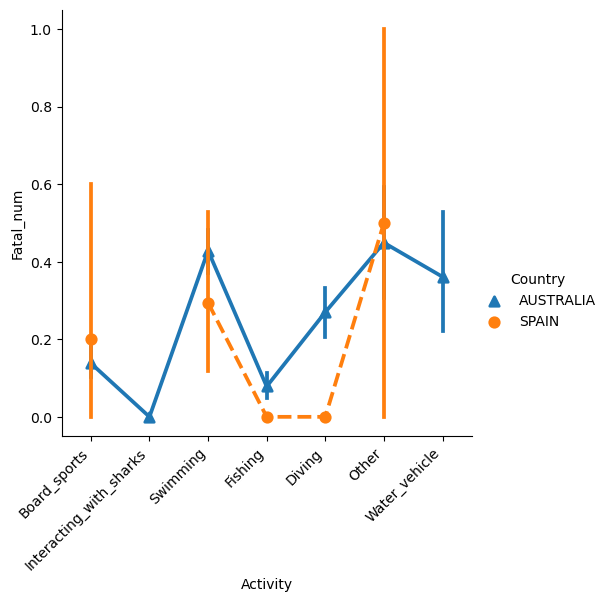

In [142]:
plt.figure(figsize=(10, 10))
sns.catplot(
    data=SPAIN, x="Activity", y="Fatal_num",hue = "Country",
    markers=["^", "o"], linestyles=["-", "--"], kind="point")
plt.xticks(rotation=45, ha='right')

In [143]:
#Parece que en cuanto a Los board sports representa, tienen muy poca mortalidad comparado con otras actividades. 

In [144]:
#Hay poca mortalidad en las tablas, vamos a hacer el mismo estudio para ver qué pasa en en los injured. 

In [145]:
#Ver qué sucede con los tiburones atacando a derecha e izquierda. 

In [182]:
Injury = Socio[['Injury']]

In [183]:
Injury

,Injury
0,No_injury
1,Legs
2,Legs
3,Legs
4,Arms
...,...
6297,Fatal
6298,Fatal
6299,Fatal
6300,Fatal


In [184]:
Filas_null(Injury,10)

,Injury
0,No_injury
1,Legs
2,Legs
3,Legs
4,Arms
...,...
6297,Fatal
6298,Fatal
6299,Fatal
6300,Fatal


<Axes: xlabel='Injury'>

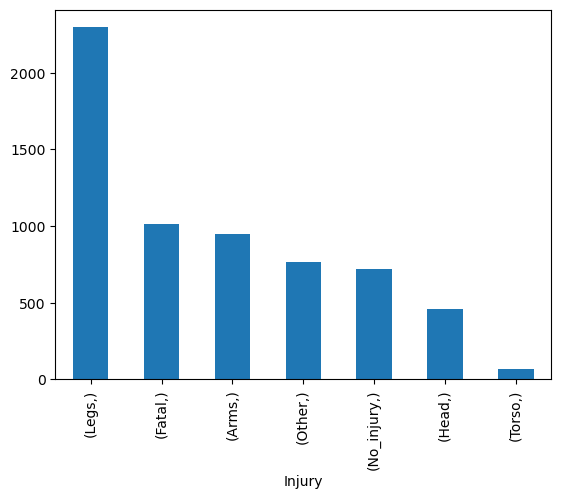

In [185]:
Injury[["Injury",]].value_counts().plot(kind = 'bar')

In [287]:
Injury_Act = Socio[['Injury','Activity']]

In [288]:
Filas_null(Injury_Act,10)

,Injury,Activity
0,No_injury,Board_sports
1,Legs,Swimming
2,Legs,Board_sports
3,Legs,Board_sports
4,Arms,Diving
...,...,...
6296,Fatal,Swimming
6297,Fatal,Diving
6298,Fatal,Diving
6299,Fatal,Swimming


In [289]:
Numerizar(Injury_Act,'Activity','Board_sports','Board_sports_yes')

In [290]:
Injury_Act

,Injury,Activity,Board_sports_yes
0,No_injury,Board_sports,1
1,Legs,Swimming,0
2,Legs,Board_sports,1
3,Legs,Board_sports,1
4,Arms,Diving,0
...,...,...,...
6296,Fatal,Swimming,0
6297,Fatal,Diving,0
6298,Fatal,Diving,0
6299,Fatal,Swimming,0


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'No_injury'),
  Text(1, 0, 'Legs'),
  Text(2, 0, 'Arms'),
  Text(3, 0, 'Fatal'),
  Text(4, 0, 'Head'),
  Text(5, 0, 'Other'),
  Text(6, 0, 'Torso')])

<Figure size 1000x1000 with 0 Axes>

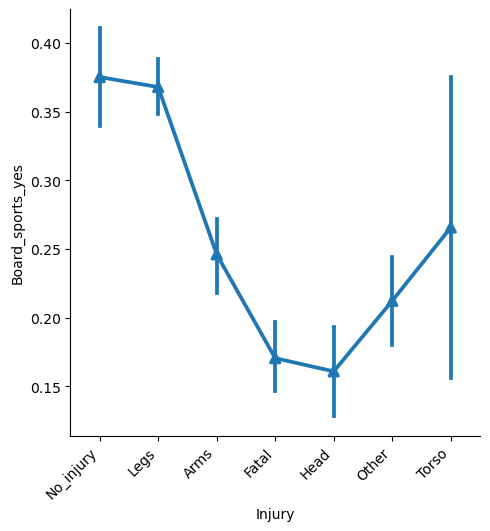

In [291]:
plt.figure(figsize=(10, 10))
sns.catplot(
    data=Injury_Act, x="Injury", y="Board_sports_yes",
    markers=["^", "o"], linestyles=["-", "--"], kind="point")
plt.xticks(rotation=45, ha='right')

In [292]:
Injury_Act = Socio[['Injury','Activity','Country']]

In [293]:
Injury_Aus = Injury_Act[Injury_Act['Country'].isin(["AUSTRALIA"])]

In [294]:
Injury_Aus

,Injury,Activity,Country
3,Legs,Board_sports,AUSTRALIA
5,No_injury,Board_sports,AUSTRALIA
10,Arms,Interacting_with_sharks,AUSTRALIA
14,Arms,Interacting_with_sharks,AUSTRALIA
16,No_injury,Board_sports,AUSTRALIA
...,...,...,...
6294,Fatal,Fishing,AUSTRALIA
6295,Fatal,Fishing,AUSTRALIA
6296,Fatal,Swimming,AUSTRALIA
6297,Fatal,Diving,AUSTRALIA


In [295]:
Filas_null(Injury_Aus,10)

,Injury,Activity,Country
3,Legs,Board_sports,AUSTRALIA
5,No_injury,Board_sports,AUSTRALIA
10,Arms,Interacting_with_sharks,AUSTRALIA
14,Arms,Interacting_with_sharks,AUSTRALIA
16,No_injury,Board_sports,AUSTRALIA
...,...,...,...
6294,Fatal,Fishing,AUSTRALIA
6295,Fatal,Fishing,AUSTRALIA
6296,Fatal,Swimming,AUSTRALIA
6297,Fatal,Diving,AUSTRALIA


In [296]:
Numerizar(Injury_Aus,'Activity','Board_sports','Board_sports_yes')

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Legs'),
  Text(1, 0, 'No_injury'),
  Text(2, 0, 'Arms'),
  Text(3, 0, 'Head'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Fatal'),
  Text(6, 0, 'Torso')])

<Figure size 1000x1000 with 0 Axes>

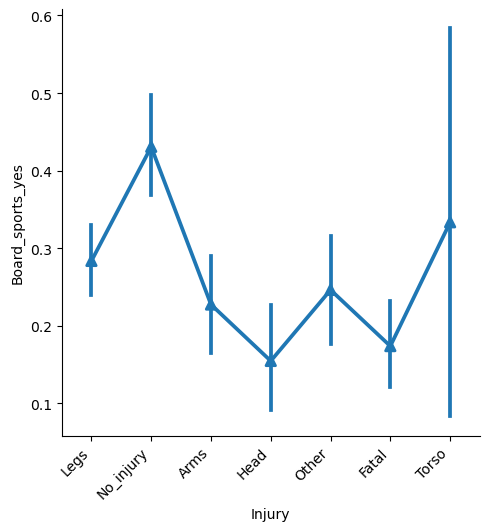

In [298]:
plt.figure(figsize=(10, 10))
sns.catplot(
    data=Injury_Aus, x="Injury", y="Board_sports_yes",
    markers=["^", "o"], linestyles=["-", "--"], kind="point")
plt.xticks(rotation=45, ha='right')

In [312]:
Prova = attack[['Injury','Activity','Country']]

In [313]:
Prova

,Injury,Activity,Country
0,"No injury to occupant, outrigger canoe and pad...",Paddling,USA
1,Minor injury to left thigh,Standing,USA
2,Injury to left lower leg from surfboard skeg,Surfing,USA
3,Minor injury to lower leg,Surfing,AUSTRALIA
4,Lacerations to leg & hand shark PROVOKED INCIDENT,Free diving,MEXICO
...,...,...,...
25718,NaN,NaN,NaN
25719,NaN,NaN,NaN
25720,NaN,NaN,NaN
25721,NaN,NaN,NaN


In [314]:
#Board_sports
cv(Prova,"Activity","Board_sports",["Board","Surf","Kite","Paddle","Paddling","Row","ski"])


,Injury,Activity,Country
0,"No injury to occupant, outrigger canoe and pad...",Board_sports,USA
1,Minor injury to left thigh,Standing,USA
2,Injury to left lower leg from surfboard skeg,Board_sports,USA
3,Minor injury to lower leg,Board_sports,AUSTRALIA
4,Lacerations to leg & hand shark PROVOKED INCIDENT,Free diving,MEXICO
...,...,...,...
25718,NaN,NaN,NaN
25719,NaN,NaN,NaN
25720,NaN,NaN,NaN
25721,NaN,NaN,NaN


In [315]:
Filas_null(Prova,10)

,Injury,Activity,Country
0,"No injury to occupant, outrigger canoe and pad...",Board_sports,USA
1,Minor injury to left thigh,Standing,USA
2,Injury to left lower leg from surfboard skeg,Board_sports,USA
3,Minor injury to lower leg,Board_sports,AUSTRALIA
4,Lacerations to leg & hand shark PROVOKED INCIDENT,Free diving,MEXICO
...,...,...,...
6296,FATAL,Swimming,AUSTRALIA
6297,FATAL,Diving,AUSTRALIA
6298,FATAL,Pearl diving,AUSTRALIA
6299,FATAL,Swimming,USA


In [316]:
Prova_surf = Prova[Prova['Activity'].isin(["Board_sports"])]

In [318]:
Prova_surf_aus = Prova_surf[Prova_surf['Country'].isin(["AUSTRALIA"])]

In [320]:
Prova_surf_aus

,Injury,Activity,Country
3,Minor injury to lower leg,Board_sports,AUSTRALIA
5,"No injury, board bitten",Board_sports,AUSTRALIA
16,"No injury, surfboard damaged",Board_sports,AUSTRALIA
19,"No injury, knocked off board by shark",Board_sports,AUSTRALIA
20,No injury,Board_sports,AUSTRALIA
...,...,...,...
5933,Thought to have been taken by a shark. Body wa...,Board_sports,AUSTRALIA
5937,"No injury to pilot, oar bitten",Board_sports,AUSTRALIA
6002,FATAL,Board_sports,AUSTRALIA
6003,FATAL,Board_sports,AUSTRALIA


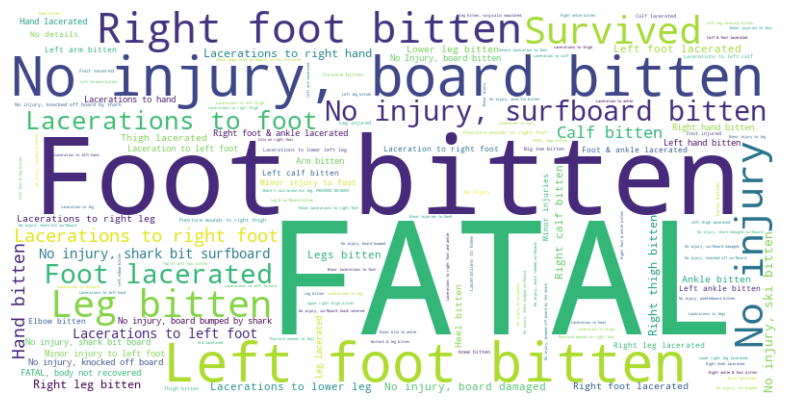

In [322]:
data = Prova_surf['Injury'].value_counts().to_dict()
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [328]:
Tabla2 = Tabla[Tabla['Activity'].isin(["Board_sports",'Swimming','Diving','Fishing'])]

<Axes: xlabel='Activity'>

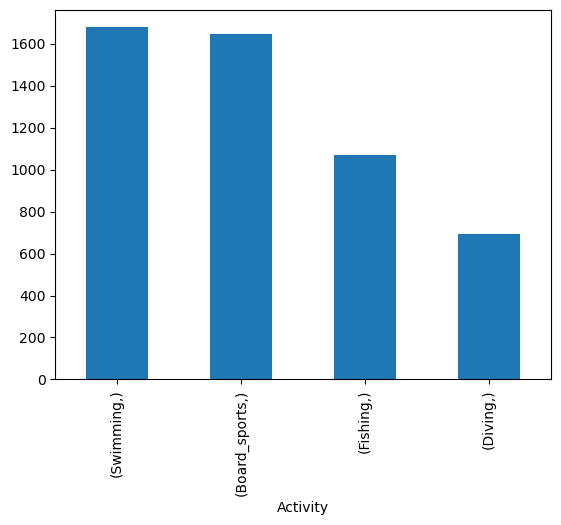

In [329]:
Tabla2[["Activity",]].value_counts().plot(kind = 'bar')

In [330]:
Act = Socio[['Activity','Fatal','Country']]

In [331]:
Filas_null(Act,10)

,Activity,Fatal,Country
0,Board_sports,N,USA
1,Swimming,N,USA
2,Board_sports,N,USA
3,Board_sports,N,AUSTRALIA
4,Diving,N,MEXICO
...,...,...,...
6296,Swimming,Y,AUSTRALIA
6297,Diving,Y,AUSTRALIA
6298,Diving,Y,AUSTRALIA
6299,Swimming,Y,USA


In [332]:
Numerizar(Act,'Fatal','Y','Fatal_num')

In [333]:
Act

,Activity,Fatal,Country,Fatal_num
0,Board_sports,N,USA,0
1,Swimming,N,USA,0
2,Board_sports,N,USA,0
3,Board_sports,N,AUSTRALIA,0
4,Diving,N,MEXICO,0
...,...,...,...,...
6296,Swimming,Y,AUSTRALIA,1
6297,Diving,Y,AUSTRALIA,1
6298,Diving,Y,AUSTRALIA,1
6299,Swimming,Y,USA,1


In [337]:
Act = Act[Act['Activity'].isin(["Board_sports",'Swimming','Diving','Fishing'])]

In [338]:
cvo(Act,'Country',['AUSTRALIA'])

,Activity,Fatal,Country,Fatal_num
0,Board_sports,N,Other,0
1,Swimming,N,Other,0
2,Board_sports,N,Other,0
3,Board_sports,N,AUSTRALIA,0
4,Diving,N,Other,0
...,...,...,...,...
6296,Swimming,Y,AUSTRALIA,1
6297,Diving,Y,AUSTRALIA,1
6298,Diving,Y,AUSTRALIA,1
6299,Swimming,Y,Other,1


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Board_sports'),
  Text(1, 0, 'Swimming'),
  Text(2, 0, 'Diving'),
  Text(3, 0, 'Fishing')])

<Figure size 1000x1000 with 0 Axes>

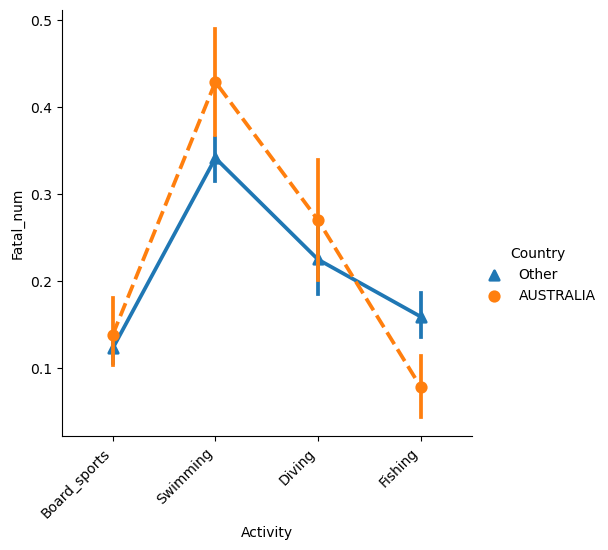

In [339]:
plt.figure(figsize=(10, 10))
sns.catplot(
    data=Act, x="Activity", y="Fatal_num",hue ='Country',
    markers=["^", "o"], linestyles=["-", "--"], kind="point")
plt.xticks(rotation=45, ha='right')